<a href="https://colab.research.google.com/github/zaq9/simpleOption/blob/master/exsample/simpleOption_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#SimpleOption 利用例

#Google Colab　上からブラウザ経由で利用する場合、初回はインストールが必要（約２０秒）
!pip install simpleOption

In [54]:
#（例：2月限C21000の理論価格、ギリシャ指標、IV等の求め方）
from simpleOption import *

op = Option('02/C21000')  
op.v(20920, 16 , 20190206) #オプション理論価格：　op.v(原資産価格、IV,評価日[yyyymmdd]　)

65.21929983699263

In [66]:
# ギリシャ指標等 の表示例
print(f'delta= {op.delta():.2}'  ) 
print(f'gamma= {op.gamma():.2}'  ) 
print(f'thetaPerDay= {op.thetaPerDay():.2f}'  )
print(f'vega= {op.vega():.2f}'  )
print(f'NPV= {op.NPV():.2f}'  )  #プレミアム理論値
print(f'payoff= {op.pay(21125):.2f}'  )  #SQが21125円時の時の受取額
print(f'iv= {op.impliedVolatility(90,process):.2f}'  )  #IV (プレミアム価格90の場合のIV)

delta= 0.39
gamma= 0.0014
thetaPerDay= -26.18
vega= 598.12
NPV= 74.75
payoff= 125.00
iv= 0.20


In [34]:
#オプションに年も指定可能（省略された場合は命令実行時の年が補完）　例は東日本大震災時のP8000価格（IV123%）
Option('201104/P8000').v(9000, 123,20110317) 

600.5561382223586

In [64]:
setting(underlying=20920,iv=17.6,	evaluationDate=20190206,rate=0.01) #setting関数 でパラメータ変更も可能）
op.v() #パラメータ省略した場合は、その直前に設定されたパラメータが適用される 

74.75008911336661

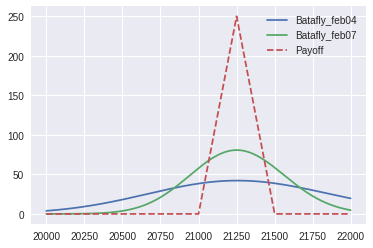

In [4]:
#　簡単な複合ポジのグラフ描画例

#グラフ描画等に必要なライブラリ読込

from simpleOption import *

import pandas as pd
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


p = Portfolio(
"""
	02/C21000[1]
	02/C21250[-2]
	02/C21500[1]
""")

x = np.arange(20000, 22000)     #グラフを描く範囲(日経平均価格範囲）
setting(20250, 26, 20190204)    #マーケット情報1（IV26％と仮定）
plt.plot(x, np.vectorize(p.v)(x), label= 'Batafly_feb04' )

setting(evaluationDate=20190207) #日付を7日に経過させたものもグラフ描画
plt.plot(x, np.vectorize(p.v)(x), label= 'Batafly_feb07' )


plt.plot(x, np.vectorize(p.pay)(x), label= 'Payoff',linestyle="dashed" )
plt.legend(loc="best")